Wir schauen uns nun den Interpolationsfehler an, also den Unterschied zwischen einer Funktion und dem Interpolationspolynom, das diese Funktion an einigen Stellen interpoliert. Wir holen uns zunächst die Definitionen des Interpolations-Notebooks.

**Wichtig**: Diese Programme sind zum Ausprobieren gedacht. Probieren Sie aus, was passiert, wenn Sie die Funktionen oder Polynomgrade ändern, und machen Sie sich die Auswirkungen klar.

In [7]:
%%capture
%run Polynominterpolation.ipynb

Hilfsfunktion: Berechne die Koeffizienten des Interpolationspolynoms für eine Funktion $f$ an den Stellen $t_j$, $j=0..n$. Werte zusätzlich das Polynom und die Funktion an $N$ Stellen auf dem Intervall $[a,b]$ aus.

In [8]:
def hilfsfunc(t,f,N,a,b):
    A=vandermonde(t)
    y=[f(z) for z in t]
    p=np.linalg.solve(A,y)
    X=np.linspace(a,b,N)
    Yorig=f(X)
    Y=np.polyval(p,X)
    return [p,X,Y,Yorig]


# Interpolation des Cosinus

Unser erstes Beispiel ist der Cosinus. Wir werten den Cosinus an einigen Stellen aus auf dem Intervall $[0,\pi]$.

maximaler Fehler:  3.110823709739918e-08


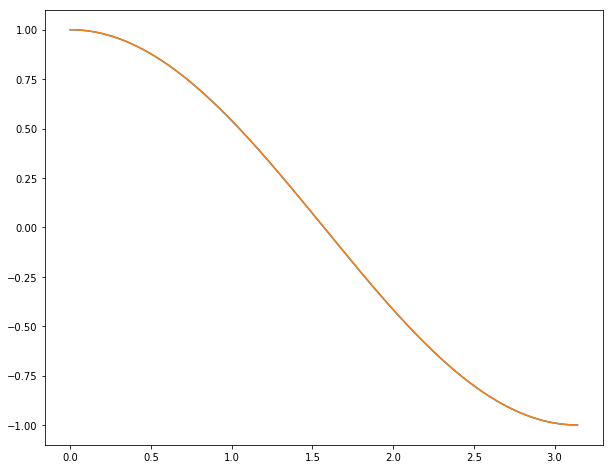

In [9]:
N=35
t=np.arange(0,N+1)/(N)*math.pi
[p,X,Y,Yorig]=hilfsfunc(t,np.cos,1024,0,math.pi)
plt.plot(X,Y,X,Yorig);
print('maximaler Fehler: ',max(abs(Y-Yorig)))

## Interpolation der Wurzelfunktion

maximaler Fehler:  3.2423563931707085


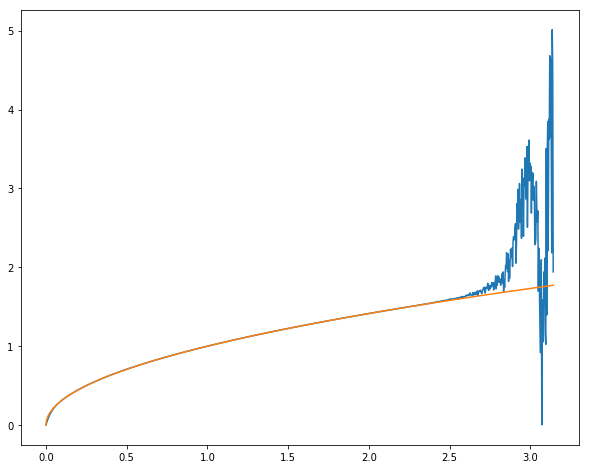

In [10]:
N=35
t=np.arange(0,N+1)/(N)*math.pi
[p,X,Y,Yorig]=hilfsfunc(t,np.sqrt,1024,0,math.pi)
plt.plot(X,Y,X,Yorig);
print('maximaler Fehler: ',max(abs(Y-Yorig)))

# Runge-Beispiel

Diesmal nehmen wir die Funktion $$f(x)=\frac 1 {1+25 x^2}.$$

maximaler Fehler:  14.393344476438232


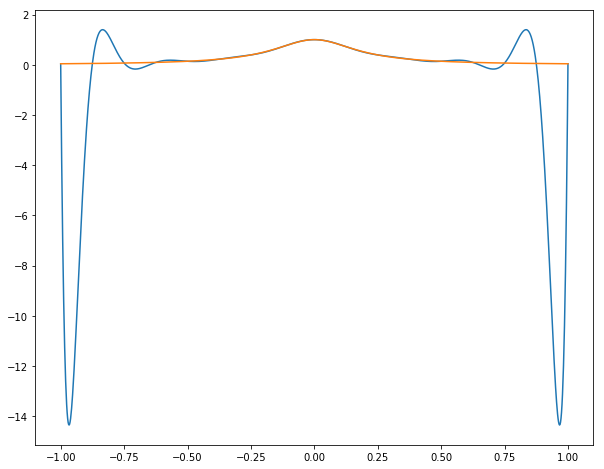

In [11]:
N=16
def f(x):
    return 1/(1+25*x*x)
t=np.arange(0,N+1)/(N)*2-1
[p,X,Y,Yorig]=hilfsfunc(t,f,1024,-1,1)
plt.plot(X,Y,X,Yorig);
print('maximaler Fehler: ',max(abs(Y-Yorig)))

# Cosinus mit kleinen Fehlern

Wir nehmen nochmal das Cosinus-Beispiel, diesmal machen wir aber einen kleinen zufälligen Fehler auf die ausgerechneten Werte.

maximaler Fehler:  2.0892490248405866


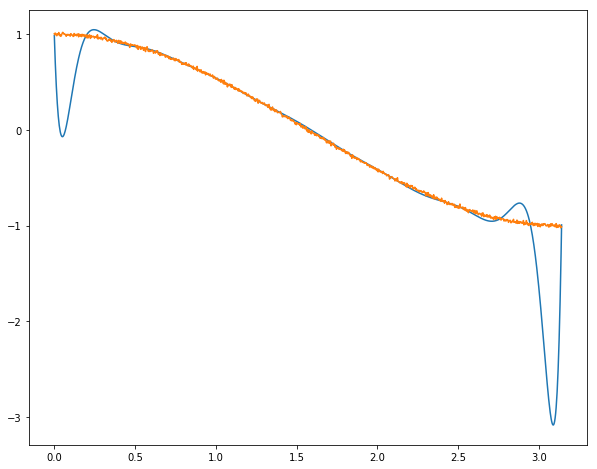

In [12]:
N=16
def f(x):
    return np.cos(x)+np.random.normal(0,1e-2,x.shape)
t=np.arange(0,N+1)/N*math.pi
[p,X,Y,Yorig]=hilfsfunc(t,f,1024,0,math.pi)
plt.plot(X,Y,X,Yorig);
print('maximaler Fehler: ',max(abs(Y-Yorig)))

Auch hier gilt: Entfernt man sich nur ganz wenig vom Cosinus, so sind die Ergebnisse schlecht. Erklärung: Der Cosinus ist eine extreme Ausnahmeerscheinung (wie der Sinus).

# Fazit

Der zu erwartende Interpolationsfehler hängt stark von der betrachteten Funktion ab. Im Allgemeinen ist es eine sehr schlechte Idee, viele Stützstellen und damit einen hohen Polynomgrad zu verwenden, denn die entstehenden Polynome sind schlecht auszuwerten und haben unangenehme Eigenschaften.